In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('Wine.csv')
data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

# Answer_1: EDA

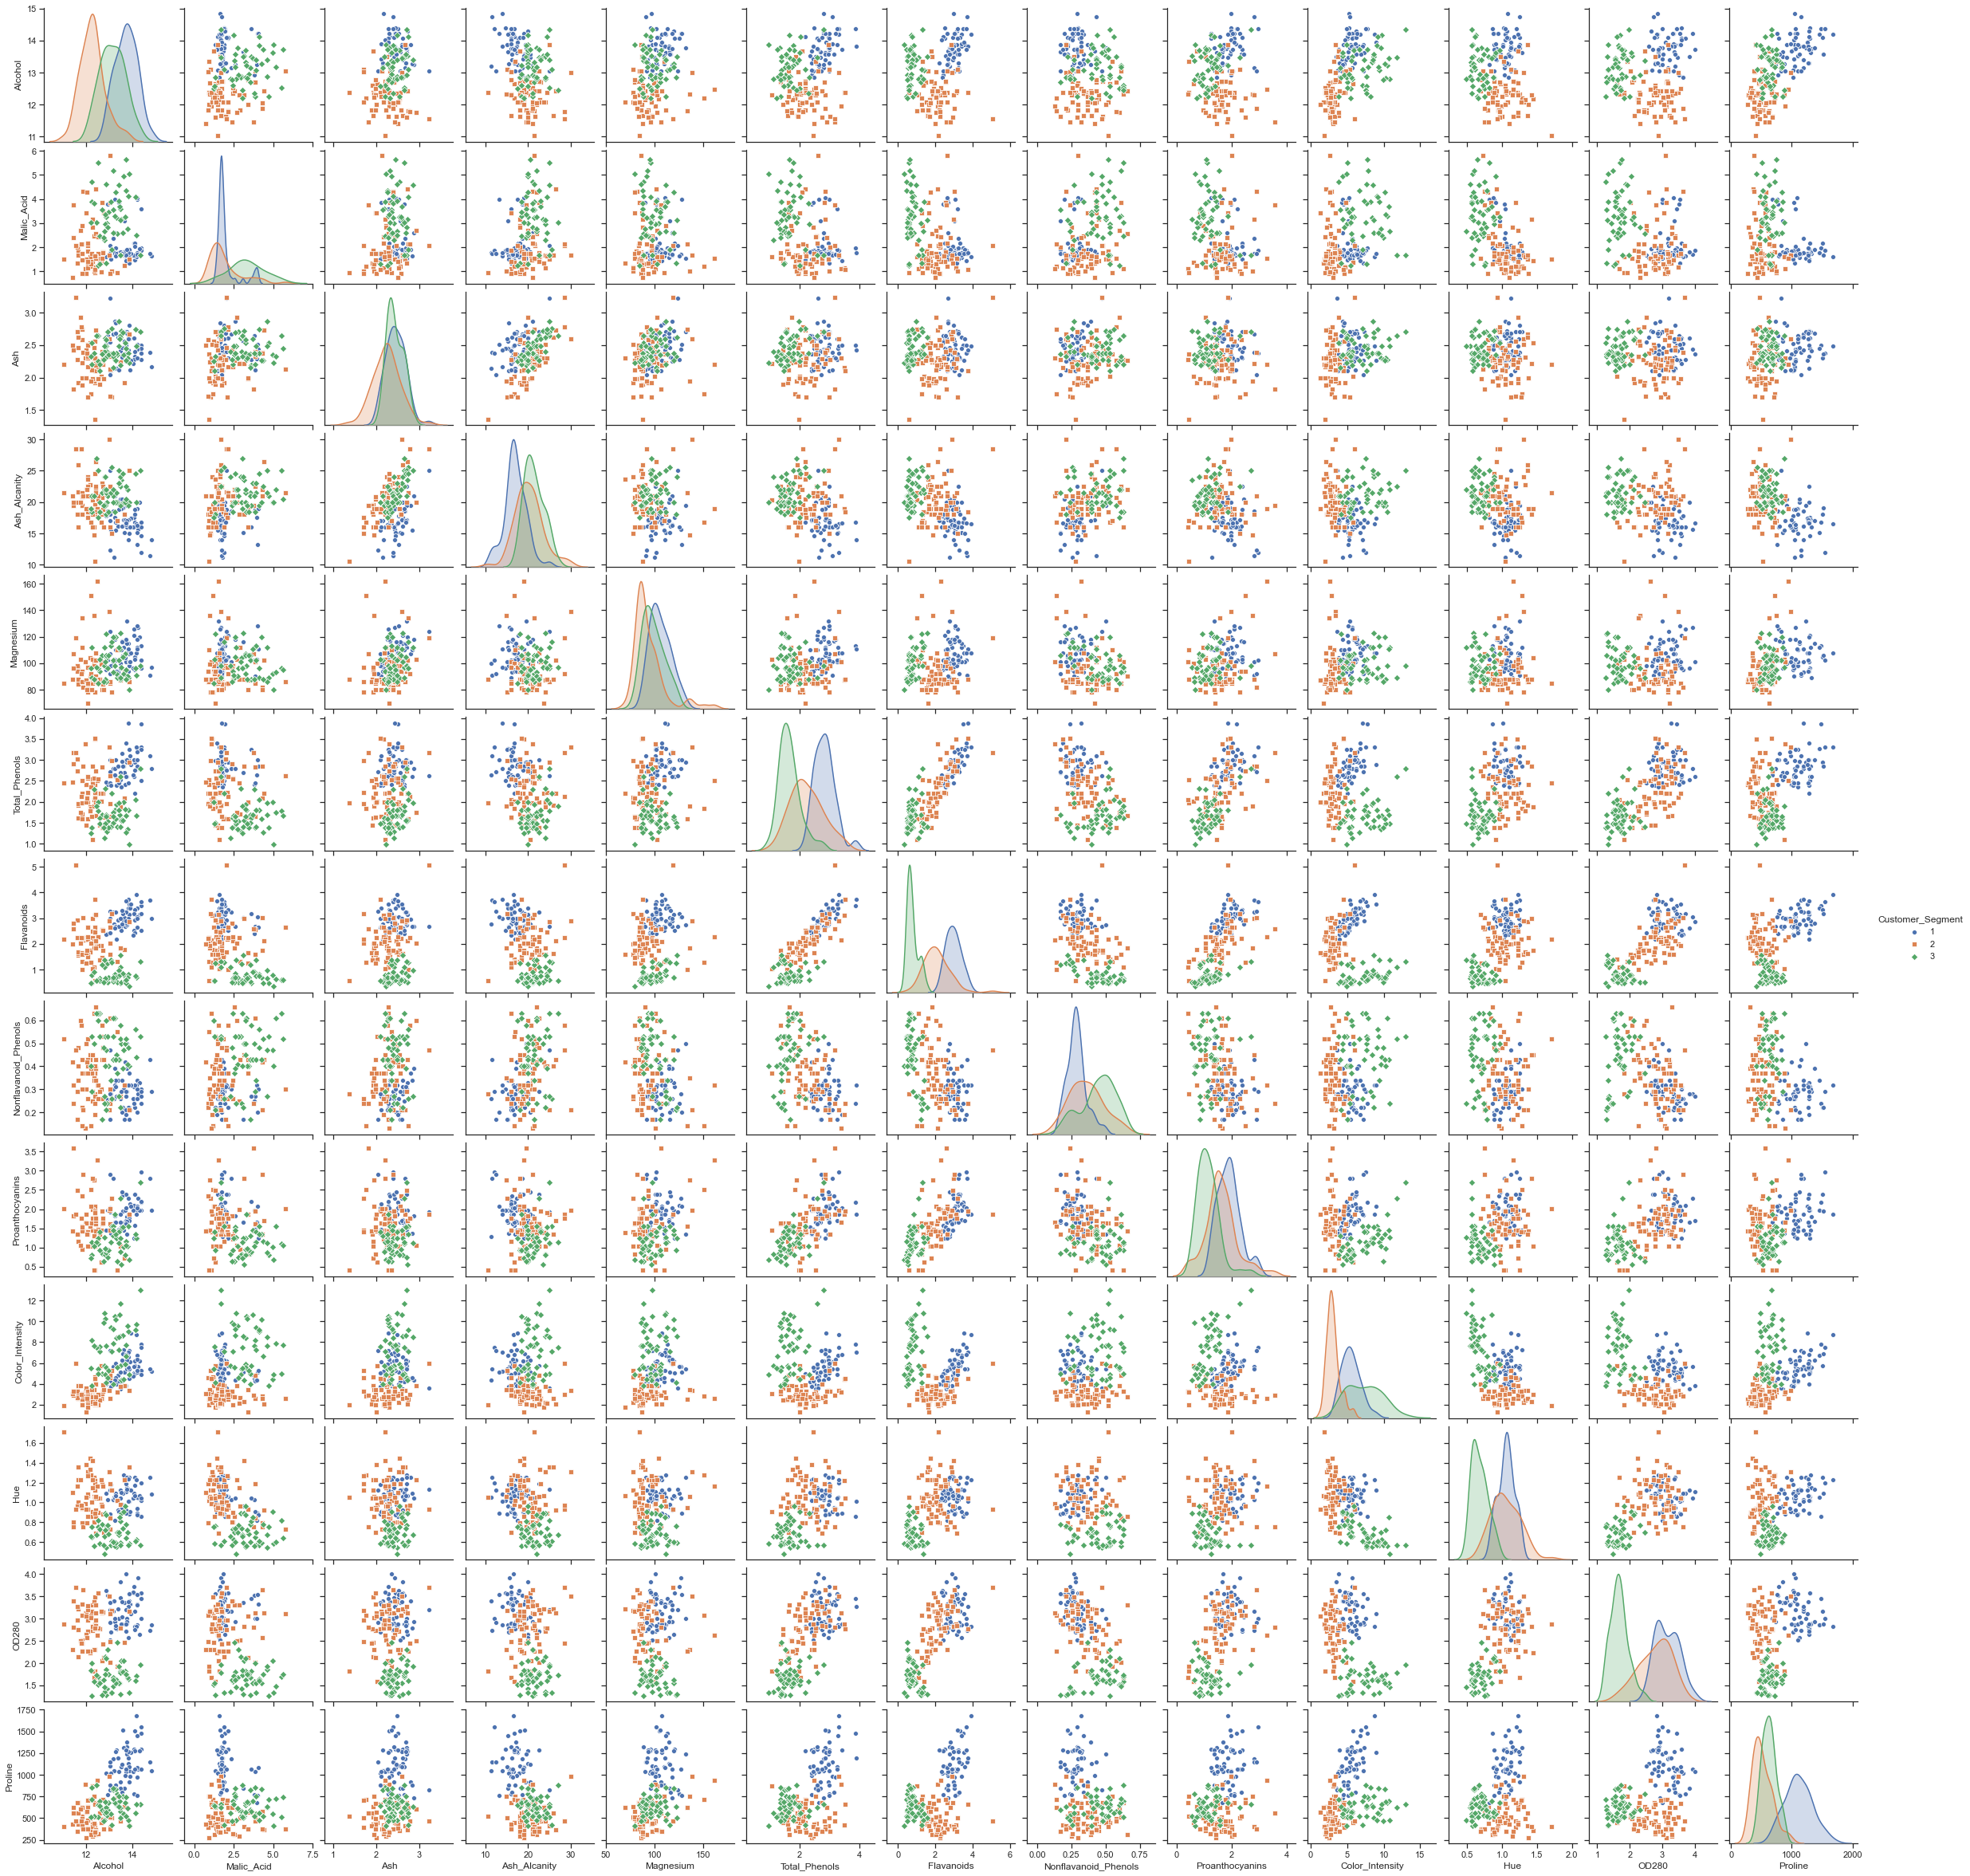

In [6]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue="Customer_Segment", markers=["o", "s", "D"])

In [7]:
corr=data.corr()
corr

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


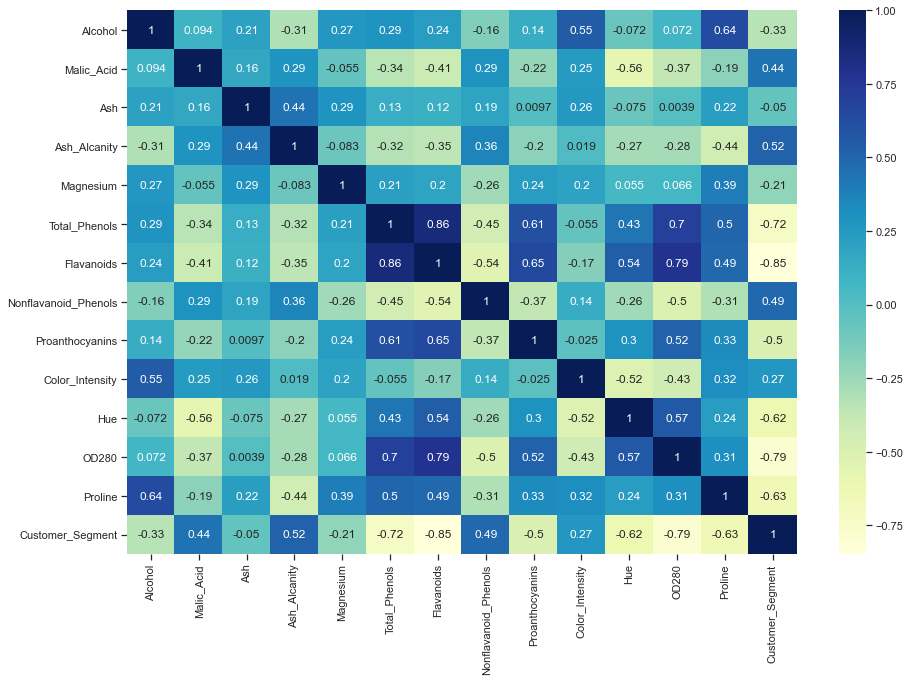

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [9]:
# we can see high correlation of independent variables with the target variables

In [10]:
data['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

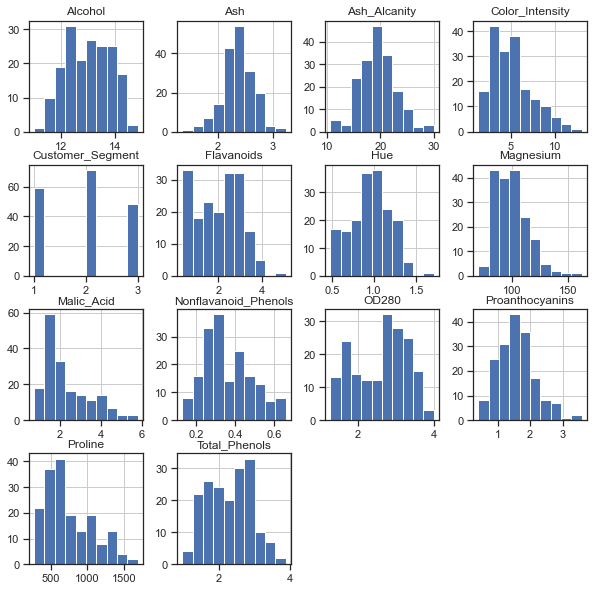

In [11]:
data.hist(figsize = (10,10));

In [12]:
# data seems to be skewed

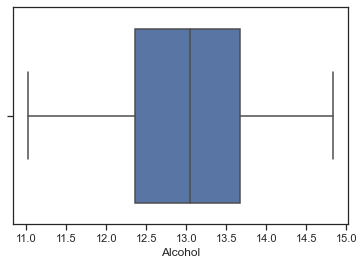

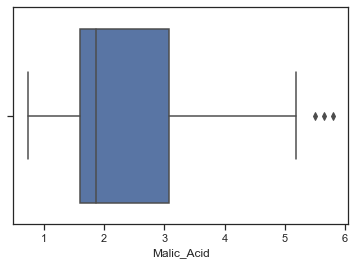

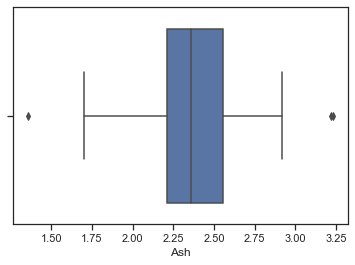

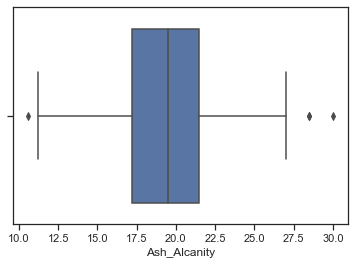

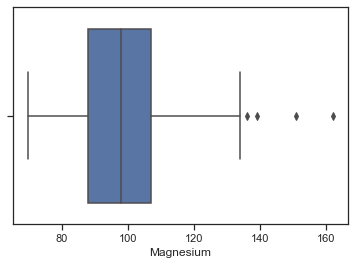

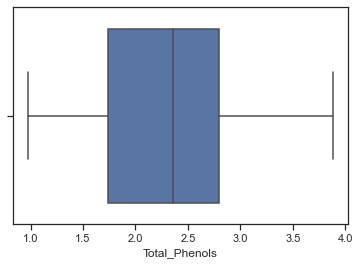

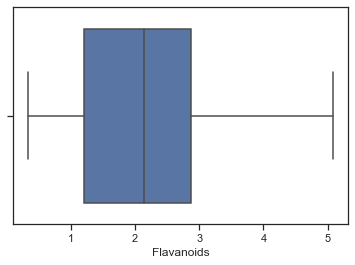

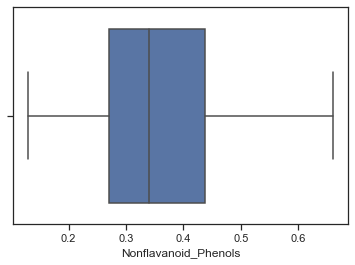

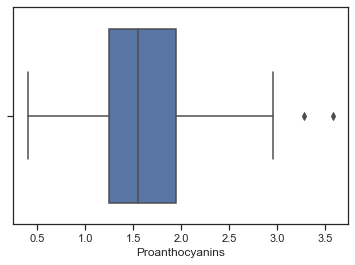

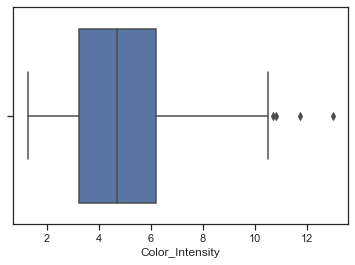

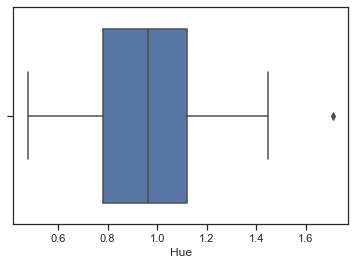

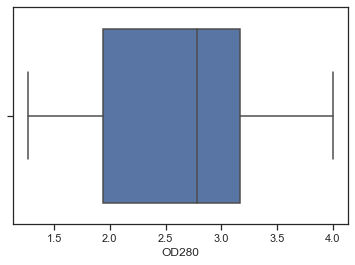

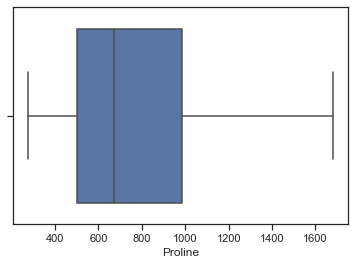

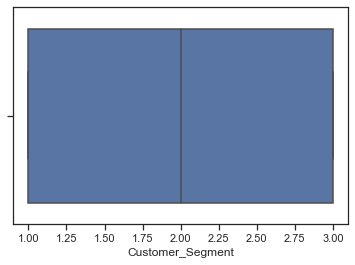

In [13]:
for col in data.columns:
    sns.boxplot(data[col])
    
    plt.show()

In [14]:
# we can see presence of some outliers in a few features

In [15]:
X=data.drop('Customer_Segment',axis=1)
y=data['Customer_Segment']

In [16]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=14)

# Answer_2: PCA

In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.37342171, 0.18890874, 0.11453122])

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf,X_train, X_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train result is: \n =============")
        print(f"Accuracy score is: {accuracy_score(y_train,pred)*100}\n")
        print(f"Confusion Matrix is: {confusion_matrix(y_train,pred)}\n")
        

        
    elif train == False:
        pred = clf.predict(X_test)
        print("Test result is: \n =============")
        print(f"Accuracy score is: {accuracy_score(y_test,pred)*100}\n")
        print(f"Confusion Matrix is: {confusion_matrix(y_test,pred)}\n")


# Answer_3: KNN

In [60]:
from sklearn import neighbors

In [61]:
k_range = range(3,40)
score = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    
print(score)

[0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556]


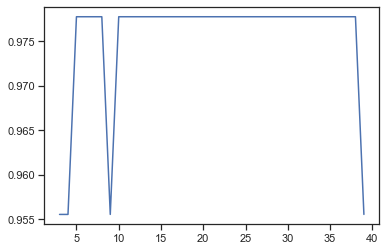

In [62]:
plt.plot(k_range,score)

In [84]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [85]:
print_score(knn,X_train, X_test, y_train, y_test, train=True)
print_score(knn,X_train, X_test, y_train, y_test, train=False)
pred = knn.predict(X_test)
c_report = classification_report(y_test,pred)
print("\n\n",c_report)

Train result is: 
Accuracy score is: 98.49624060150376

Confusion Matrix is: [[43  0  0]
 [ 1 51  1]
 [ 0  0 37]]

Test result is: 
Accuracy score is: 97.77777777777777

Confusion Matrix is: [[16  0  0]
 [ 1 17  0]
 [ 0  0 11]]



               precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        11

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Answer_4: SVM

In [65]:
from sklearn import svm 
from sklearn.svm import SVC 

model = SVC(kernel="linear")
model.fit(X_train, y_train)

print_score(model,X_train, X_test, y_train, y_test, train=True)
print_score(model,X_train, X_test, y_train, y_test, train=False)

pred = model.predict(X_test)
c_report = classification_report(y_test,pred)
print("\n\n",c_report)

Train result is: 
Accuracy score is: 96.2406015037594

Confusion Matrix is: [[42  1  0]
 [ 2 50  1]
 [ 0  1 36]]

Test result is: 
Accuracy score is: 91.11111111111111

Confusion Matrix is: [[14  2  0]
 [ 1 17  0]
 [ 1  0 10]]



               precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.89      0.94      0.92        18
           3       1.00      0.91      0.95        11

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.91      0.91      0.91        45



In [66]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

print_score(model,X_train, X_test, y_train, y_test, train=True)
print_score(model,X_train, X_test, y_train, y_test, train=False)

pred = model.predict(X_test)
c_report = classification_report(y_test,pred)
print("\n\n",c_report)

Train result is: 
Accuracy score is: 98.49624060150376

Confusion Matrix is: [[43  0  0]
 [ 1 51  1]
 [ 0  0 37]]

Test result is: 
Accuracy score is: 95.55555555555556

Confusion Matrix is: [[16  0  0]
 [ 1 17  0]
 [ 0  1 10]]



               precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       0.94      0.94      0.94        18
           3       1.00      0.91      0.95        11

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



In [67]:
model = SVC(kernel="sigmoid")
model.fit(X_train, y_train)

print_score(model,X_train, X_test, y_train, y_test, train=True)
print_score(model,X_train, X_test, y_train, y_test, train=False)

pred = model.predict(X_test)
c_report = classification_report(y_test,pred)
print("\n\n",c_report)

Train result is: 
Accuracy score is: 97.74436090225564

Confusion Matrix is: [[43  0  0]
 [ 1 50  2]
 [ 0  0 37]]

Test result is: 
Accuracy score is: 97.77777777777777

Confusion Matrix is: [[16  0  0]
 [ 1 17  0]
 [ 0  0 11]]



               precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        11

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [68]:
model = SVC(kernel="poly")
model.fit(X_train, y_train)

print_score(model,X_train, X_test, y_train, y_test, train=True)
print_score(model,X_train, X_test, y_train, y_test, train=False)

pred = model.predict(X_test)
c_report = classification_report(y_test,pred)
print("\n\n",c_report)

Train result is: 
Accuracy score is: 93.98496240601504

Confusion Matrix is: [[38  5  0]
 [ 0 52  1]
 [ 0  2 35]]

Test result is: 
Accuracy score is: 88.88888888888889

Confusion Matrix is: [[14  2  0]
 [ 2 16  0]
 [ 0  1 10]]



               precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.84      0.89      0.86        18
           3       1.00      0.91      0.95        11

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.89      0.89      0.89        45



### SVM using hyperparameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}  
  
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3) 
  

grid.fit(X_train, y_train) 





Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.593, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.462, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.407, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.385, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.385, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.407, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.407, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.407, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.385, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.926, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.962, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.963, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.963, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.407, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.385, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.385, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.963, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.963, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.963, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.923, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.407, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.407, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.385, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.385, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.963, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.963, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .

[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.815, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.815, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.846, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.846, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.889, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.926, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.963, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.963, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.926, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.889, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.963, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.926, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.962, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.926, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=1.000, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.4s finished


GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [70]:
print(grid.best_params_) 
print("This is the best hyperparameter combination")

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
This is the best hyperparameter combination


In [71]:
print(grid.best_estimator_) 

SVC(C=0.1, gamma=1, kernel='linear')


In [72]:
grid_predictions = grid.predict(X_test) 


print_score(grid,X_train, X_test, y_train, y_test, train=True)
print_score(grid,X_train, X_test, y_train, y_test, train=False)

print("\n")
print(classification_report(y_test, grid_predictions)) 

Train result is: 
Accuracy score is: 98.49624060150376

Confusion Matrix is: [[43  0  0]
 [ 1 51  1]
 [ 0  0 37]]

Test result is: 
Accuracy score is: 95.55555555555556

Confusion Matrix is: [[16  0  0]
 [ 1 17  0]
 [ 0  1 10]]



              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       0.94      0.94      0.94        18
           3       1.00      0.91      0.95        11

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



# Answer_5: Naive Bayes

In [73]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

print_score(gnb,X_train, X_test, y_train, y_test, train=True)
print_score(gnb,X_train, X_test, y_train, y_test, train=False)
pred = gnb.predict(X_test)
c_report = classification_report(y_test,pred)
print("\n\n",c_report)

Train result is: 
Accuracy score is: 97.74436090225564

Confusion Matrix is: [[42  1  0]
 [ 1 51  1]
 [ 0  0 37]]

Test result is: 
Accuracy score is: 95.55555555555556

Confusion Matrix is: [[16  0  0]
 [ 1 17  0]
 [ 0  1 10]]



               precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       0.94      0.94      0.94        18
           3       1.00      0.91      0.95        11

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



# Answer_6: Conclusion

##  `Train data`:
#### 1) KNN: 98.49%
#### 2)SVM(linear): 96.24%
#### 3)SVM(rbf): 98.49%
#### 4)SVM(sigmoid): 97.74%
#### 5)SVM(poly): 93.98%
#### 6)SVM(hyperparameter tuning): 98.49%
#### 7)Naive Bayes: 97.74%

##  `Test data`:
#### 1) KNN: 97.77%
#### 2)SVM(linear): 91.11%
#### 3)SVM(rbf): 95.55%
#### 4)SVM(sigmoid): 97.77%
#### 5)SVM(poly): 88.88%
#### 6)SVM(hyperparameter tuning): 95.55%
#### 7)Naive Bayes: 95.55%

# According to accuracy score of various models we tried out we get the best score using KNN(97.77%)